In [71]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [72]:
#Load the dataset
data= ('C:/Users/sheryl.ojwando/Downloads/mpg.csv')
df=pd.read_csv(data)

In [73]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.00,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.00,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.00,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.00,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.00,3449,10.5,70,1,ford torino


In [74]:
#Print summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [75]:
#Drop rows with missing values and select some features
df= df.dropna()
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [76]:
#Drop rows with missing values and select some features
df['horsepower'] = df['horsepower'].replace('?', np.nan)

df['horsepower'] = df['horsepower'].astype(float)

df['horsepower'] = df['horsepower'].fillna(df['horsepower'].mean())


features = ['horsepower', 'weight','displacement','acceleration','cylinders']
target = 'mpg'

In [77]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.199187,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


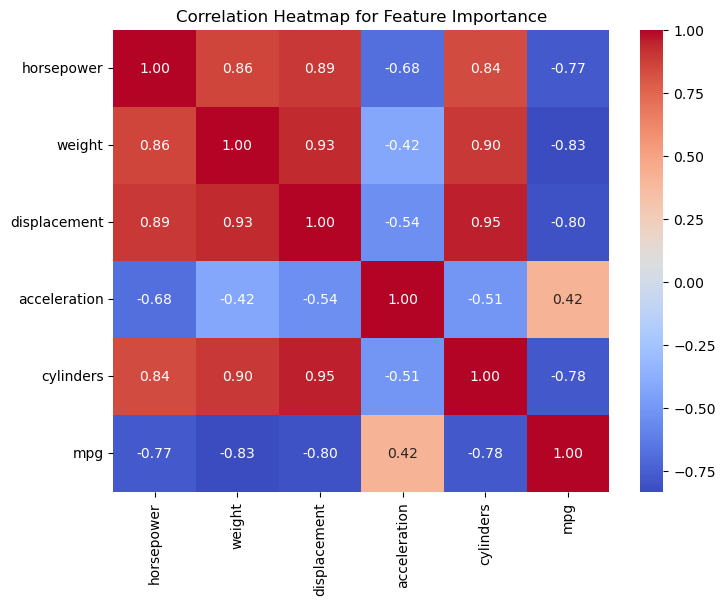

In [78]:
#Calculate correlation matrix
correlation_matrix = df[features + [target]].corr()

#Plot heatmap of feature importance
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',fmt=".2f")
plt.title('Correlation Heatmap for Feature Importance')
plt.show()

#### Horsepower, weight, dispalcement and cylinder have a higher correlation to the target variable mpg hence we will choose them as the feature variables for further processing

In [79]:
#Select new features
X = df[['horsepower', 'weight','displacement','cylinders']].values
y = df['mpg'].values

In [80]:
#Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
#Create a Linear regression model
model = LinearRegression()

#Train the model
model.fit(X_train, y_train)

LinearRegression()

In [82]:
#Make predictions on the test set
y_pred=model.predict(X_test)

In [86]:
#Evaluate the model
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 14.64


#### The MSE =14.64 meaning the RSME (Root Mean Squared Error)= 3.83. This means that the model perfomance is moderate as the RSME is 16% of the mean ( This model's prediction of mpg are on average off by 3.83 mpg)

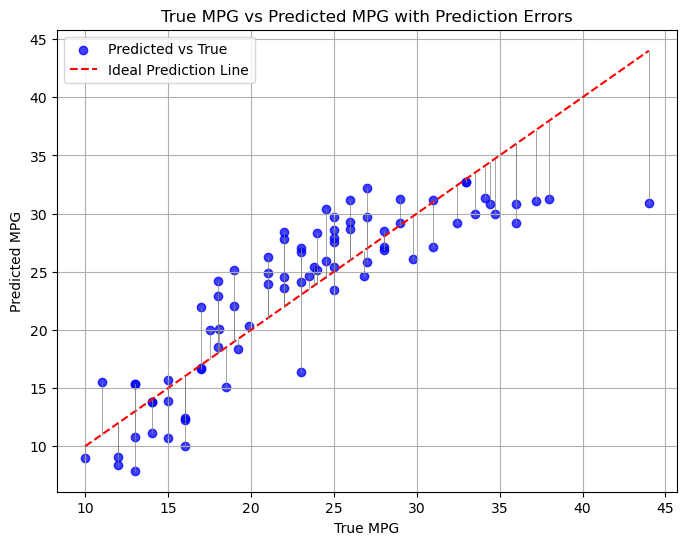

In [85]:
#Plot the true vs predicted mpg
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.75, color='blue', label='Predicted vs True')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red',linestyle='--', label='Ideal Prediction Line')

#Calculate and plot prediction errors
for (true_value, predicted_value) in zip(y_test, y_pred):
    plt.plot([true_value, true_value], [true_value, predicted_value], color='gray', linestyle='-', linewidth=0.5)

plt.xlabel("True MPG")
plt.ylabel("Predicted MPG")
plt.title("True MPG vs Predicted MPG with Prediction Errors")
plt.legend()
plt.grid(True)
plt.show()
           

#### The plot shows a a generally positive linear trend, meaning the predicted MPG values incraese with true MPG values
#### The points generally cluster close to the ideal prediction line , indicating that the model is performing fairly well overall. 
#### The model capture the trend well, but there are deviations , escpecially for higher MPG values. This could indicate the model performs better on certain ranges of MPG but struggles

